/home/sayan/test/env/lib/python3.10/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Mean of the whole avocado image: 294.1211
Pixel value at ( 10 , 10 ): 228.0
Box Dimensions: 75 31 108 368
Mean intensity 248.41975
Threshold Value: 248
Mean of Image with Mask: 676.26654


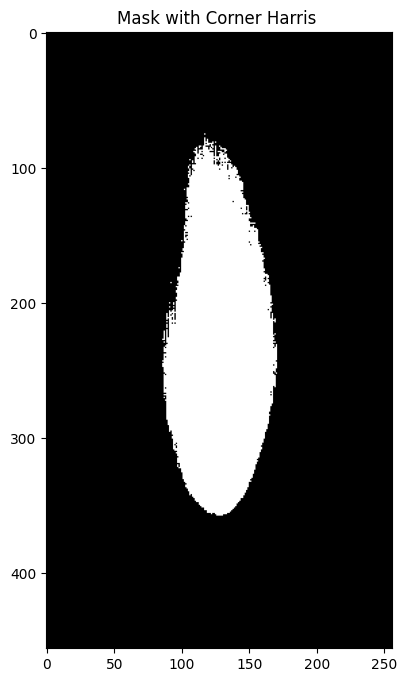

In [1]:
import matplotlib.pyplot as plt
import cv2
from spectral import *
from hyperAvodata_f1 import avocado_f1_back
import numpy as np


single_band_data = avocado_f1_back[0].read_band(223)
im = np.asarray(single_band_data* 255 , dtype='uint8')
test_band = avocado_f1_back[0][:, :, 150]

meanval= np.mean(test_band)
# mean of the image band 0
print("Mean of the whole avocado image:", meanval)


# printing pixel value
x =10
y = 10
pixel_value = single_band_data[x,y]
print("Pixel value at (", x, ",", y, "):", pixel_value)

# default values as Parameters for corner detection
blockSize = 2 
ksize = 3      
k = 0.04   


# finding corners from corner harris
corners = cv2.cornerHarris(single_band_data, blockSize, ksize, k)


# Find bounding box around the corners
non_zero = np.where(corners > 0.01 * corners.max())
x, y, w, h = np.min(non_zero[1]), np.min(non_zero[0]), np.max(non_zero[1]) - np.min(non_zero[1]), np.max(non_zero[0]) - np.min(non_zero[0])

print("Box Dimensions:", x, y, w, h)
avo_reg= single_band_data[y:y+h, x:x+w]

# find the mean of the intensity
mean_intensity = np.mean(avo_reg)
print("Mean intensity", mean_intensity)

# applying Threshold
threshold_value = int(mean_intensity) 
print("Threshold Value:", threshold_value)

ret, mask = cv2.threshold(single_band_data, threshold_value, 255, cv2.THRESH_BINARY)
cv2.bitwise_and


# applying mask to separating the foreground from mask
masked_image =test_band.copy()
masked_image[mask == 0] = 0

ir = np.mean(masked_image[mask> 0])

# finding the mean
mean_intensity_with_mask = np.mean(masked_image)

print("Mean of Image with Mask:", ir)

# plt mask
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap='gray')
plt.title('Mask with Corner Harris ')
plt.show()


Mean of the whole avocado image: 294.1211
Pixel value at ( 10 , 10 ): [228.]
Mean of Image with Mask: 700.5388


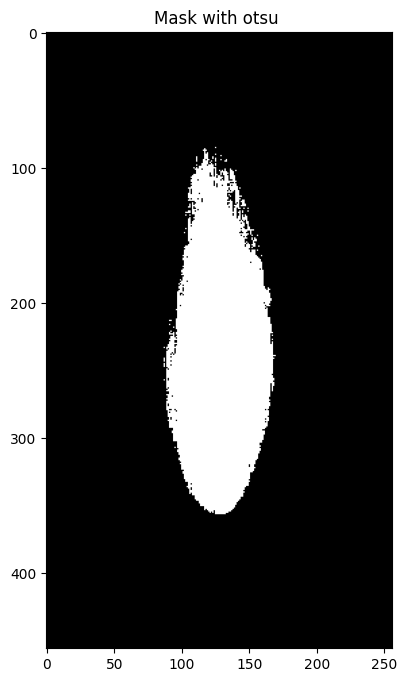

In [3]:
import matplotlib.pyplot as plt
import cv2
from spectral import *
from avo_front import avocado_front_data  
import numpy as np
 
single_band_data = avocado_f1_back[0][:, :, 223]
im = np.asarray(single_band_data* 255 , dtype='uint8')
test_band = avocado_f1_back[0][:, :, 150]

meanval= np.mean(test_band)
# mean of the image band 0
print("Mean of the whole avocado image:", meanval)


# printing pixel value
x =10
y = 10
pixel_value = single_band_data[x,y]
print("Pixel value at (", x, ",", y, "):", pixel_value)


ret, mask = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.bitwise_and


# applying mask to separating the foreground from mask
masked_image =test_band.copy()
masked_image[mask == 0] = 0

ir = np.mean(masked_image[mask> 0])

# finding the mean value
mean_intensity_with_mask = np.mean(ir)

print("Mean of Image with Mask:", ir)

# plt mask
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap='gray')
plt.title('Mask with otsu ')
plt.show()